In [110]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.feature import hog
from skimage.color import rgb2gray

In [111]:
class DBSCAN:
    def __init__(self, epsilon, min_pts):
        self.epsilon = epsilon
        self.min_pts = min_pts
        self.clusters = []
        self.noise = []
        self.center = []
    @staticmethod
    def _euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def _get_neighbors(self, dataset, point):
        neighbors = []
        for index, candidate in enumerate(dataset):
            if self._euclidean_distance(point, candidate) < self.epsilon:
                neighbors.append(index)
        return neighbors
    
    def fit(self, dataset):
        visited = [False]*len(dataset)
        for index in range(len(dataset)):
            if not visited[index]:
                visited[index] = True
                neighbors = self._get_neighbors(dataset, dataset[index])
                if len(neighbors) < self.min_pts:
                    self.noise.append(index)
                else:
                    self._expand_cluster(dataset, visited, index, neighbors)
                    #self.center.append(index)
        return self.clusters, self.noise

    def _expand_cluster(self, dataset, visited, index, neighbors):
        self.clusters.append([index])
        i = 0
        while i < len(neighbors):
            next_index = neighbors[i]
            if not visited[next_index]:
                visited[next_index] = True
                next_neighbors = self._get_neighbors(dataset, dataset[next_index])
                if len(next_neighbors) >= self.min_pts:
                    neighbors += next_neighbors
            cluster_indices = [i for cluster in self.clusters for i in cluster]
            if next_index not in cluster_indices:
                self.clusters[-1].append(next_index)
            i += 1

In [3]:
import random
import numpy as np


class Kmean:
    def __init__(self, k):
        self.k = k
        self.means = None
        self.difference = []

    def classification(self, inputs):
        return np.argmin([self.squared_distance(inputs, self.means[i]) for i in range(len(self.means))])

    def train(self, inputs):
        self.means = random.sample(inputs, self.k)
        assignments = np.zeros(len(inputs))
        past_means = np.zeros((self.k, 3))
        while True:
            new_assignments = list(map(self.classification, inputs))
            if np.max(abs(self.means - past_means)) < 0.5:
                return
            else:
                self.difference.append(np.max(abs(self.means - past_means)))
                past_means = np.array(self.means)
                assignments = new_assignments
            for i in range(self.k):
                i_point = [p for p, a in zip(inputs, assignments) if a == i]
                if i_point:
                    self.means[i] = np.mean(i_point, axis=0)
            

    def squared_distance(self, x, y):
        d = np.sqrt(((x - y) ** 2).sum())
        return d

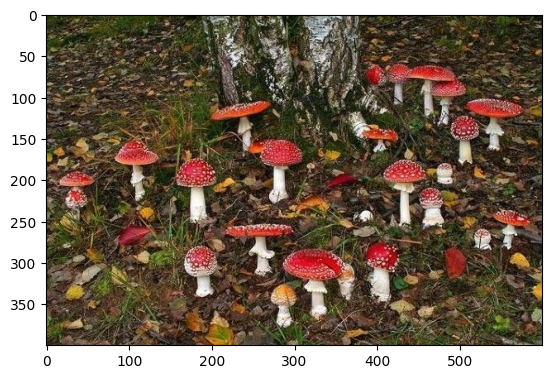

In [197]:
mage = mpimg.imread(f'amude.jpg')
plt.imshow(mage)
plt.show()

In [198]:
def distance2(x, y):
    #d = np.sqrt(((x - y) ** 2).sum()) #euclid
    #d = np.max(np.abs(x-y)) # cheb
    d =  np.sum((np.abs(x-y))) # manh
    return d

In [199]:
def distance_base(x, y):
    d = np.sqrt(((x - y) ** 2).sum())
    return d

In [200]:
#([130,0,0]<=age[i][j]).all() and (age[i][j]<=[255,60,60]).all()
ethalon = [200,40,40]
ethalon1 = [160,90,80]
ethalon2 = [190,140,130]
ethalon3 = [240,120,12]
ethalon4 = [229,149,98]
ethalon5 = [97,55,73]
ethalon6 = [214,137,149]
ethalon7 = [234,180,101]
ethalon8 = [196,139,65]
ethalon9 = [116,73,41]


In [201]:
age = mage.copy()
coor = []
for  i in range (np.shape(age)[0]):
    for j in range (np.shape(age)[1]):
        if distance2(age[i][j],ethalon) < 80 or distance2(age[i][j],ethalon1) < 30 or distance2(age[i][j],ethalon2) < 30 or distance2(age[i][j],ethalon3) < 35 or distance2(age[i][j],ethalon4) < 20 or distance2(age[i][j],ethalon5) < 20 or distance2(age[i][j],ethalon6) < 20 or distance2(age[i][j],ethalon7) < 40 or distance2(age[i][j],ethalon7) < 40 or distance2(age[i][j],ethalon9) < 20:
            age[i][j] = [0,0,255]
            coor.append([i,j])

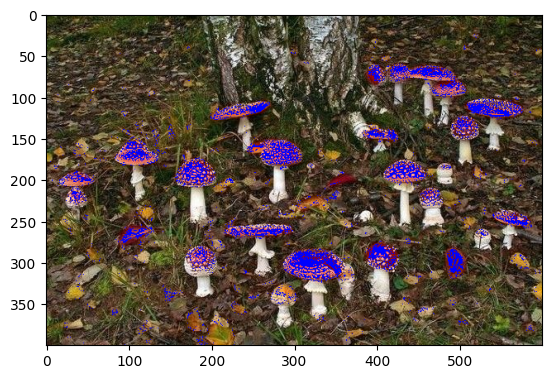

In [202]:
plt.imshow(age)

In [10]:
plt.imsave('jsk2ex.jpg',age)

In [203]:
coor = np.array(coor)
print(coor)

[[ 24 518]
 [ 25 521]
 [ 26 517]
 ...
 [399 188]
 [399 191]
 [399 227]]


In [204]:
dbscan = DBSCAN(epsilon=10, min_pts=20)
clusters, noise = dbscan.fit(coor)
print(clusters)

[[44, 33, 36, 47, 51, 52, 53, 54, 55, 56, 62, 63, 64, 89, 90, 91, 92, 93, 94, 95, 96, 115, 116, 117, 118, 119, 120, 121, 122, 158, 159, 160, 161, 202, 203, 204, 205, 206, 207, 208, 259, 260, 261, 262, 263, 264, 265, 266, 267, 319, 320, 321, 322, 37, 38, 323, 324, 384, 385, 386, 387, 388, 389, 316, 317, 318, 378, 379, 380, 381, 382, 383, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 325, 496, 497, 498, 499, 500, 501, 502, 503, 504, 554, 555, 556, 557, 558, 559, 560, 561, 562, 268, 65, 601, 602, 603, 604, 605, 606, 607, 608, 609, 635, 636, 637, 638, 639, 640, 641, 642, 672, 673, 674, 675, 676, 677, 678, 66, 209, 643, 671, 698, 699, 700, 701, 702, 703, 715, 716, 717, 718, 704, 719, 737, 738, 739, 720, 740, 754, 755, 756, 757, 758, 759, 760, 761, 57, 67, 210, 211, 269, 270, 326, 446, 505, 610, 773, 777, 68, 97, 98, 123, 162, 163, 212, 213, 271, 327, 390, 447, 448, 449, 506, 563, 611, 612, 644, 39, 48, 69, 124, 164, 214, 70, 99, 125, 165, 215, 272, 328, 450, 451, 564, 762, 71, 100, 126,

In [205]:
means = []
for i in clusters:
    means.append(np.mean(np.array(coor[i]),axis=0))
means = np.int32(means)

In [206]:
def perecolor(img):
    whidith = np.shape(img)[0]
    length = np.shape(img)[1]
    nw = np.copy(img)
    for i in range(whidith):
        for j in range(length):
            if (i==0 or i==(whidith-1)) or (j==0 or j==(length-1) or i==1 or i==(whidith-2)) or (j==1 or j==(length-2) or i==2 or i==(whidith-3)) or (j==2 or j==(length-3)):
                nw[i,j] = [0,0,255]
    return nw

In [183]:
def lengst (clst, mane):
    bg = 0
    for i in clst:
        if distance_base(i,mane)>bg:
            bg = distance_base(i,mane)
    return bg

In [207]:
sd = []

In [208]:
for i, ft in enumerate(clusters):
    sd.append(lengst(coor[ft],means[i])/10)

In [209]:
for i in range (len(sd)):
    print(np.int32(np.ceil(sd[i])))

7
6
5
3
1
4
4
1
5
4
1
3
2
2
1
3
2
5
3
1
3
3
3
6
2
2
2
1
2
1
1
2
2


In [210]:
gag = []
ga = mage.copy()
a = 10 # ширина
b = 50# длинна вниз
b2 =10 # длина вверх
for i,j in enumerate(means):
    #ga[j[0]-a*np.int32(np.ceil(sd[i])):j[0]+a*np.int32(np.ceil(sd[i])),j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))] = perecolor(mage[j[0]-a*np.int32(np.ceil(sd[i])):j[0]+a*np.int32(np.ceil(sd[i])),j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))])
    ga[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i]))+20,j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))] = perecolor(mage[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i]))+20,j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))])
    gag.append(mage[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i])),j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))])


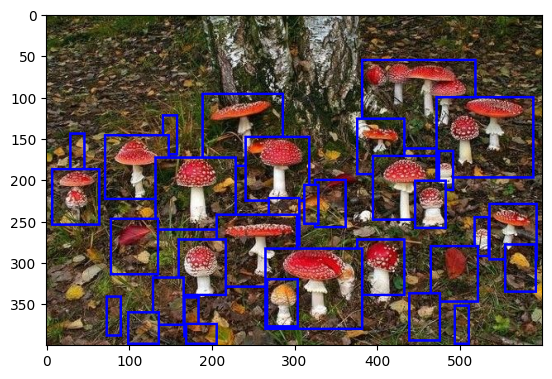

In [211]:
plt.imshow(ga)

In [21]:
plt.imsave('jsk212.jpg',ga)

In [212]:
def RBF(X,Y, gamma):
    
    
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF 
    K = np.exp(-gamma * np.sum((X - Y)**2, axis = -1))
    
    return K

In [213]:
def dfk(coef,Xex,vectors,gam,bet):
    k = np.sign(np.sum(coef*RBF(Xex,vectors,gam)) + bet)
    return k

In [265]:
gamma_r = 0.01
#beta_r = np.array([-0.92401939])
#beta_r = np.array([-0.58926533])
beta_r = np.array([-2.15165203])
dual_coef_r = np.loadtxt('model.dual_coef_r.txt')
support_r = np.loadtxt('support_vectors_r.txt')

In [257]:
gamma_b = 0.05
#beta_b = np.array([-0.3888666])
#beta_b = np.array([-0.45469997])
beta_b = np.array([-0.48338117])
dual_coef_b = np.loadtxt('model.dual_coef_b.txt')
support_b = np.loadtxt('support_vectors_b.txt')

In [258]:
gamma_pod = 0.05
#beta_b = np.array([-0.30397187])
#beta_pod = np.array([-0.517916038])
beta_pod = np.array([-0.35397187])
dual_coef_pod = np.loadtxt('model.dual_coef_pod.txt')
support_pod = np.loadtxt('support_vectors_pod.txt')

In [259]:
gamma_sm = 0.05
#beta_b = np.array([-0.39168536])
#beta_sm = np.array([-0.34198983])
beta_sm = np.array([-0.38072294])
dual_coef_sm = np.loadtxt('model.dual_coef_smorch.txt')
support_sm = np.loadtxt('support_vectors_smorch.txt')

In [266]:
gag = []
ga = mage.copy()
a = 10 # ширина
b = 50# длинна вниз
b2 =10 # длина вверх
for i,j in enumerate(means):
    #dfk(dual_coef,X_test[5],support,gamma,b)
    #dfk(dual_coef_r,test,support_r,gamma_r,beta_r) == 1
    t = mage[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i]))+20,j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))]
    if t.shape[0] != 0 and t.shape[1] != 0:
        test = hog(rgb2gray(resize(mage[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i]))+20,j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))],(128,64))), orientations=8,pixels_per_cell=(8, 8),cells_per_block=(1, 1)) #channel_axis=-1)
        if dfk(dual_coef_sm,test,support_sm,gamma_sm,beta_sm) == 1 or dfk(dual_coef_pod,test,support_pod,gamma_pod,beta_pod) == 1 or dfk(dual_coef_b,test,support_b,gamma_b,beta_b) == 1 or dfk(dual_coef_r,test,support_r,gamma_r,beta_r) == 1:
            #ga[j[0]-a*np.int32(np.ceil(sd[i])):j[0]+a*np.int32(np.ceil(sd[i])),j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))] = perecolor(mage[j[0]-a*np.int32(np.ceil(sd[i])):j[0]+a*np.int32(np.ceil(sd[i])),j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))])
            ga[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i]))+20,j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))] = perecolor(mage[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i]))+20,j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))])
        gag.append(mage[j[0]-a*2:j[0]+a*np.int32(np.ceil(sd[i])),j[1]-a*np.int32(np.ceil(sd[i])):j[1]+a*np.int32(np.ceil(sd[i]))])

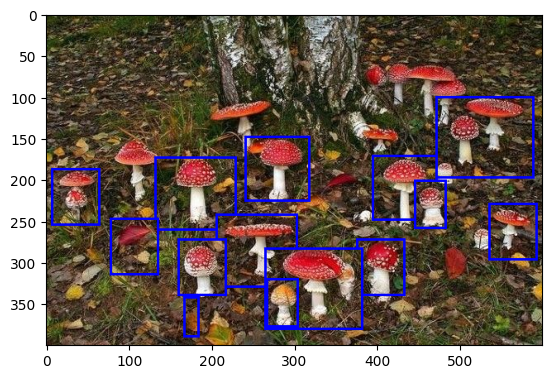

In [267]:
plt.imshow(ga)

In [245]:
plt.imsave('jsksup64.jpg',ga)

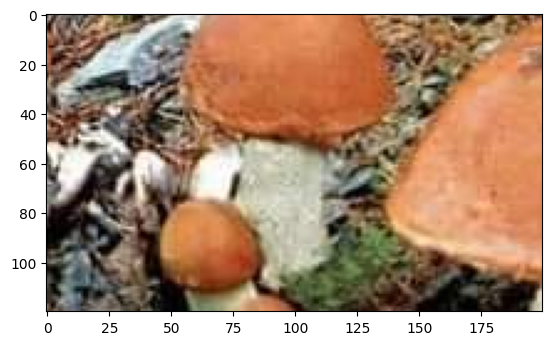

In [29]:
plt.imshow(gag[20])

In [30]:
plt.imshow(gag[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2080184460.py, line 1)

In [ ]:
plt.imsave('tst2.jpg',gag[14])

In [ ]:
ethalon2 = [190,190,190]

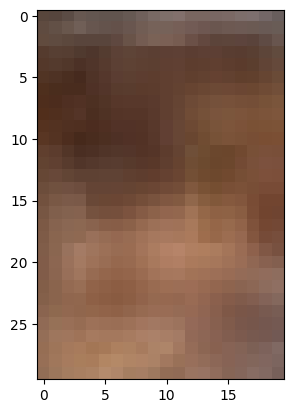

In [ ]:
plt.imshow(gag[15])



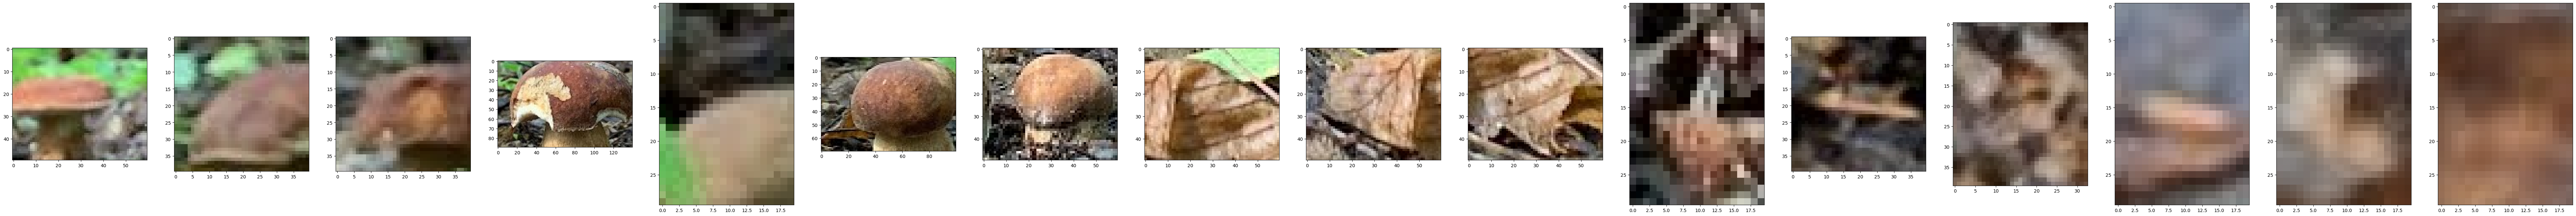

In [ ]:
fig, ax = plt.subplots(1,len(gag), figsize = (100, 100))
for i in range(len(ax)):
    ax[i].imshow(gag[i])
plt.show()

In [ ]:
ethalon = [150,40,40]
ethalon2 = [190,140,130]

In [ ]:
def mush_f(img):
    q1 = 0
    q2 = 0
    a = np.shape(img)[1]
    a = int(a)//2
    sub1 = img[:a,:]
    pixels1 = [pixel for row in sub1 for pixel in row]
    clusterer = Kmean(2)
    clusterer.train(pixels1)
    
    
    sub2 = img[a:,:]
    pixels2 = [pixel for row in sub2 for pixel in row]
    clusterer2 = Kmean(2)
    clusterer2.train(pixels2)
    if (distance2(clusterer.means[0],ethalon) <= 105)  or (distance2(clusterer.means[1],ethalon) <= 105):
        q1=1
    else:
        q1=0
    if(distance2(clusterer2.means[0],ethalon2)<= 105) or (distance2(clusterer2.means[1],ethalon2) <= 105):
        q2=1
    else:
        q2=0
    print(q1,q2)
    if q1*q2==1:
        print('here')
        return 1
    else:
        return 0

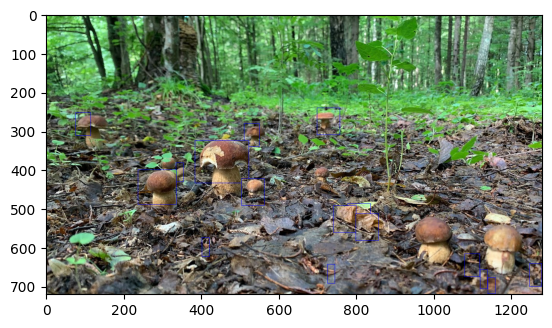

In [ ]:
plt.imshow(ga)

In [ ]:
plt.imsave('kek.jpg',ga)

In [ ]:
for i in means:
    print(mage[i[0]-b:i[0]+b,i[1]-a:i[1]+a])

[[[ 91 180  64]
  [ 81 179  56]
  [ 83 183  57]
  ...
  [ 32 108  36]
  [ 38 114  39]
  [ 48 127  48]]

 [[ 90 183  69]
  [ 86 183  67]
  [ 83 184  64]
  ...
  [ 75 156  77]
  [ 73 155  70]
  [ 73 157  71]]

 [[ 98 191  85]
  [ 97 195  84]
  [ 93 193  79]
  ...
  [ 85 170  85]
  [ 83 169  78]
  [ 82 171  79]]

 ...

 [[240 240 230]
  [204 202 190]
  [149 145 133]
  ...
  [128 124 113]
  [124 120 108]
  [132 128 117]]

 [[247 251 237]
  [190 190 180]
  [129 126 117]
  ...
  [112 114 100]
  [115 118 101]
  [122 125 108]]

 [[204 208 193]
  [139 140 134]
  [ 92  91  87]
  ...
  [107 119  99]
  [112 124 102]
  [119 128 107]]]
[[[ 57  67  33]
  [ 49  60  26]
  [ 35  49  14]
  ...
  [ 59 136  34]
  [ 68 145  51]
  [ 77 152  70]]

 [[ 75 105  51]
  [ 60  98  39]
  [ 62 102  40]
  ...
  [ 78 147  64]
  [ 78 149  69]
  [ 88 160  86]]

 [[ 85 131  67]
  [ 86 137  68]
  [ 84 138  63]
  ...
  [ 89 158  78]
  [ 98 169  91]
  [ 98 170  96]]

 ...

 [[ 57  63  51]
  [ 46  52  42]
  [ 22  29  22]
  ..